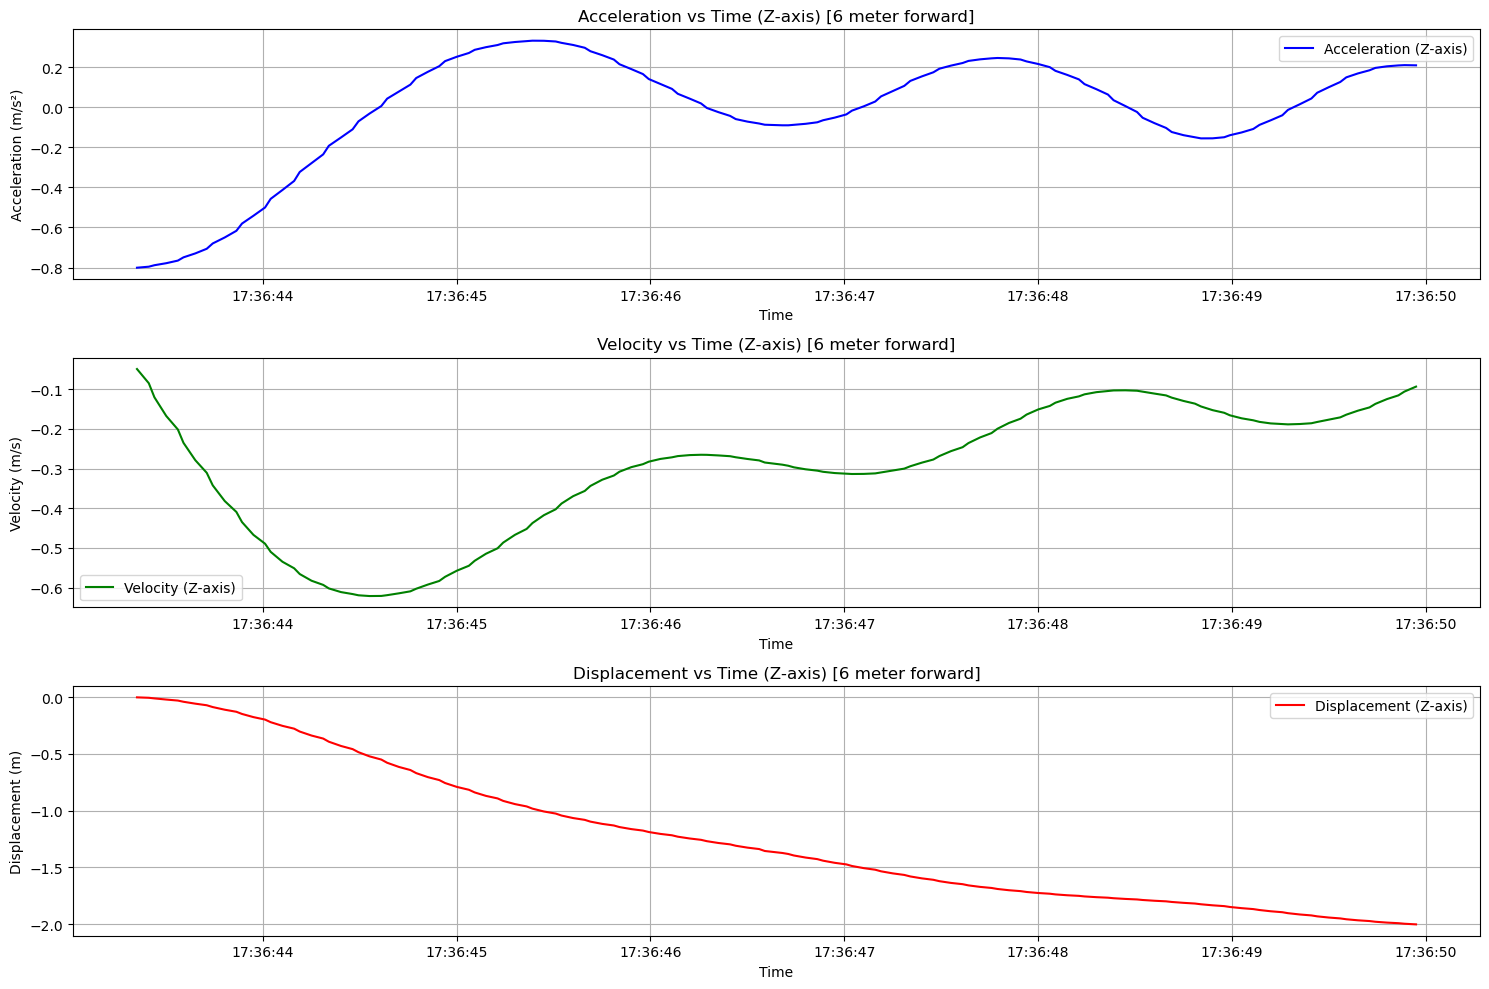

Final Displacement (Z-axis): -2.00 meters


In [19]:
# GRAPHS FOR 6METERS FORWARD USING LOW PASS FILTER

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the CSV file, skipping the first 4 rows
d = pd.read_csv('accel6m.csv', skiprows=4)
df = d.iloc[12:145].copy()  # Create a copy to avoid SettingWithCopyWarning

# Combine 'Date' and 'HostTimestamp' columns into a single datetime column if not already combined
df['Date'] = pd.to_datetime(df['Date'])  # Adjust if needed to match your column name

# Convert Z-axis acceleration from mg to m/s²
df['Acc_Z (m/s²)'] = df['Z (mg)'] * 0.00981
df.loc[:, 'Acc_Z (m/s²)'] = df['Acc_Z (m/s²)'] - df['Acc_Z (m/s²)'].mean()


from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the low-pass filter
cutoff = 1.0  # desired cutoff frequency of the filter (Hz)
fs = 50.0     # sample rate (Hz)
order = 2     # filter order

# Apply the low-pass filter
df.loc[:, 'Acc_Z (m/s²)'] = butter_lowpass_filter(df['Acc_Z (m/s²)'], cutoff, fs, order)

# Compute time differences in seconds from the start time
df.loc[:, 'Time_s'] = (df['Date'] - df['Date'].iloc[0]).dt.total_seconds()

# Compute time differences (for trapezoidal integration)
time_diffs = np.gradient(df['Time_s'])

# Integrate acceleration to get velocity using the trapezoidal rule
df.loc[:, 'Velocity_Z'] = np.cumsum(df['Acc_Z (m/s²)'] * time_diffs)

# Integrate velocity to get displacement using the trapezoidal rule
df.loc[:, 'Displacement_Z'] = np.cumsum(df['Velocity_Z'] * time_diffs)

# Plotting
plt.figure(figsize=(15, 10))

# Plot Acceleration
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Acc_Z (m/s²)'], label='Acceleration (Z-axis)', color='blue')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time (Z-axis) [6 meter forward]')
plt.grid(True)
plt.legend()

# Plot Velocity
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Velocity_Z'], label='Velocity (Z-axis)', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time (Z-axis) [6 meter forward]')
plt.grid(True)
plt.legend()

# Plot Displacement
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Displacement_Z'], label='Displacement (Z-axis)', color='red')
plt.xlabel('Time')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs Time (Z-axis) [6 meter forward]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print the final displacement
final_displacement = df['Displacement_Z'].iloc[-1]
print(f"Final Displacement (Z-axis): {final_displacement:.2f} meters")

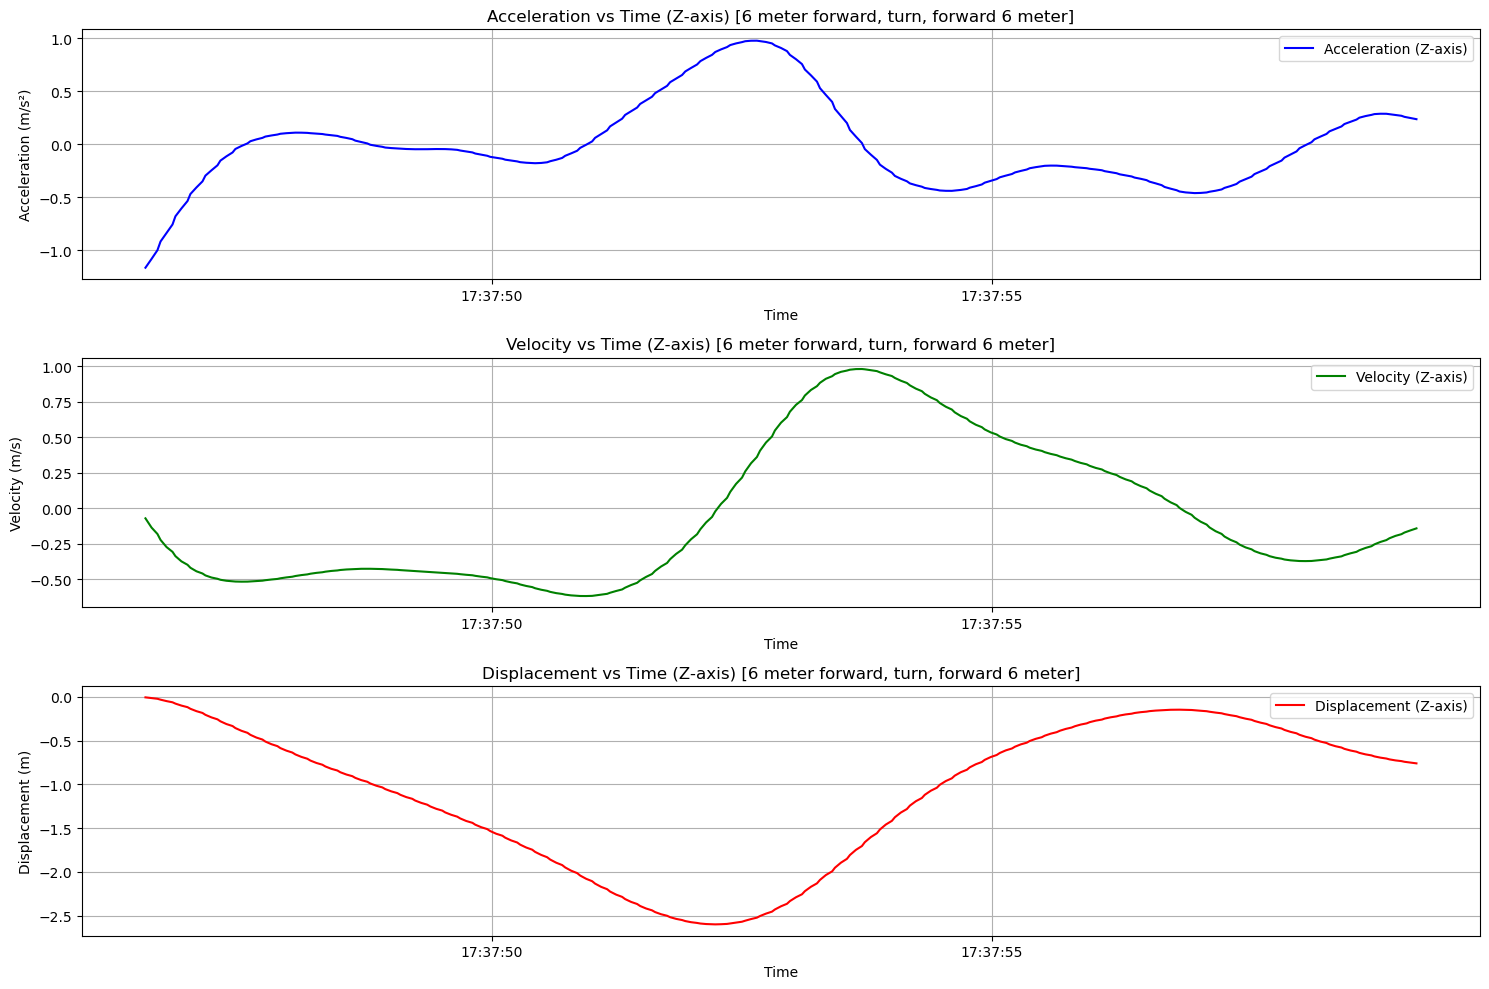

Final Displacement (Z-axis): -0.76 meters


In [21]:
# GRAPHS FOR 6METERS FORWARD, TURN 180 DEGREES, 6METERS BACKWARD, USING LOW PASS FILTER


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file, skipping the first 4 rows
d = pd.read_csv('accel6mTurn.csv', skiprows=4)
df = d.iloc[20:275].copy()  # Create a copy to avoid SettingWithCopyWarning

# Combine 'Date' and 'HostTimestamp' columns into a single datetime column if not already combined
df['Date'] = pd.to_datetime(df['Date'])  # Adjust if needed to match your column name

# Convert Z-axis acceleration from mg to m/s²
df['Acc_Z (m/s²)'] = df['Z (mg)'] * 0.00981
df.loc[:, 'Acc_Z (m/s²)'] = df['Acc_Z (m/s²)'] - df['Acc_Z (m/s²)'].mean()

from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the low-pass filter
cutoff = 1.0  # desired cutoff frequency of the filter (Hz)
fs = 50.0     # sample rate (Hz)
order = 2     # filter order

# Apply the low-pass filter
df.loc[:, 'Acc_Z (m/s²)'] = butter_lowpass_filter(df['Acc_Z (m/s²)'], cutoff, fs, order)

# Compute time differences in seconds from the start time
df.loc[:, 'Time_s'] = (df['Date'] - df['Date'].iloc[0]).dt.total_seconds()

# Compute time differences (for trapezoidal integration)
time_diffs = np.gradient(df['Time_s'])

# Integrate acceleration to get velocity using the trapezoidal rule
df.loc[:, 'Velocity_Z'] = np.cumsum(df['Acc_Z (m/s²)'] * time_diffs)

# Integrate velocity to get displacement using the trapezoidal rule
df.loc[:, 'Displacement_Z'] = np.cumsum(df['Velocity_Z'] * time_diffs)

# Plotting
plt.figure(figsize=(15, 10))

# Plot Acceleration
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Acc_Z (m/s²)'], label='Acceleration (Z-axis)', color='blue')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time (Z-axis) [6 meter forward, turn, forward 6 meter]')
plt.grid(True)
plt.legend()

# Plot Velocity
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Velocity_Z'], label='Velocity (Z-axis)', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time (Z-axis) [6 meter forward, turn, forward 6 meter]')
plt.grid(True)
plt.legend()

# Plot Displacement
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Displacement_Z'], label='Displacement (Z-axis)', color='red')
plt.xlabel('Time')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs Time (Z-axis) [6 meter forward, turn, forward 6 meter]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print the final displacement
final_displacement = df['Displacement_Z'].iloc[-1]
print(f"Final Displacement (Z-axis): {final_displacement:.2f} meters")

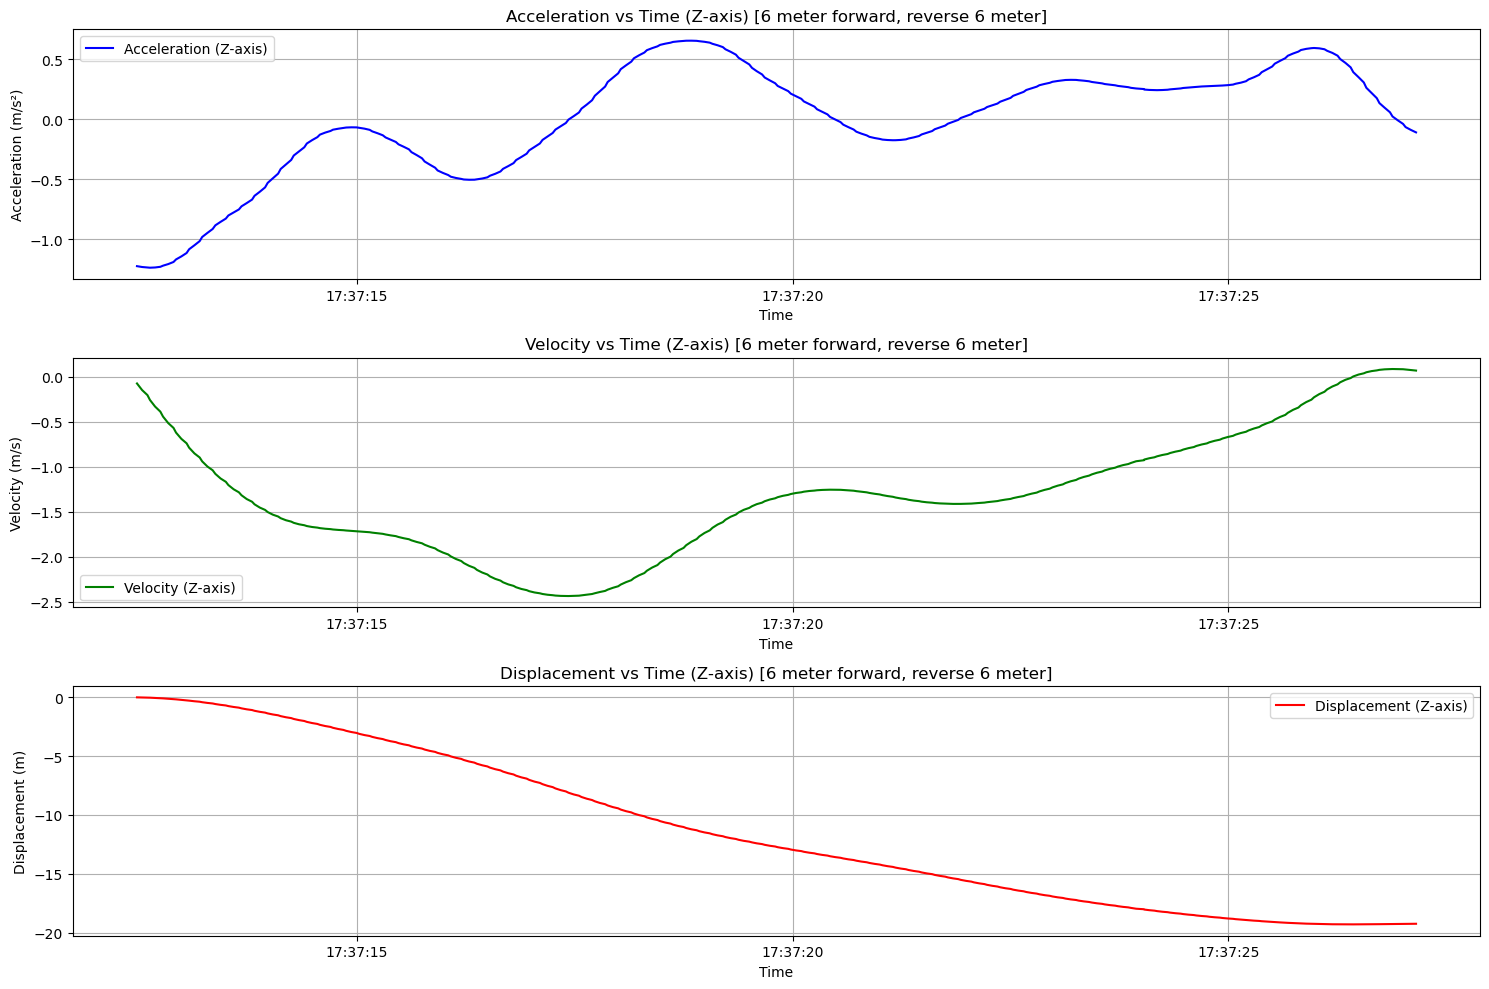

Final Displacement (Z-axis): -19.25 meters


In [23]:
#GRAPHS FOR 6M FORWARD, 6M REVERSE, USING LOWPASS FILTER


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file, skipping the first 4 rows
d = pd.read_csv('accel6mReverse.csv', skiprows=4)
df = d.iloc[10:304].copy()  # Create a copy to avoid SettingWithCopyWarning
#15-80-132
# Combine 'Date' and 'HostTimestamp' columns into a single datetime column if not already combined
df['Date'] = pd.to_datetime(df['Date'])  # Adjust if needed to match your column name

# Convert Z-axis acceleration from mg to m/s²
df['Acc_Z (m/s²)'] = df['Z (mg)'] * 0.00981
df.loc[:, 'Acc_Z (m/s²)'] = df['Acc_Z (m/s²)'] - df['Acc_Z (m/s²)'].mean()

from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the low-pass filter
cutoff = 1.0  # desired cutoff frequency of the filter (Hz)
fs = 50.0     # sample rate (Hz)
order = 2     # filter order

# Apply the low-pass filter
df.loc[:, 'Acc_Z (m/s²)'] = butter_lowpass_filter(df['Acc_Z (m/s²)'], cutoff, fs, order)


# Compute time differences in seconds from the start time
df.loc[:, 'Time_s'] = (df['Date'] - df['Date'].iloc[0]).dt.total_seconds()

# Compute time differences (for trapezoidal integration)
time_diffs = np.gradient(df['Time_s'])

# Integrate acceleration to get velocity using the trapezoidal rule
df.loc[:, 'Velocity_Z'] = np.cumsum(df['Acc_Z (m/s²)'] * time_diffs)

# Integrate velocity to get displacement using the trapezoidal rule
df.loc[:, 'Displacement_Z'] = np.cumsum(df['Velocity_Z'] * time_diffs)

# Plotting
plt.figure(figsize=(15, 10))

# Plot Acceleration
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Acc_Z (m/s²)'], label='Acceleration (Z-axis)', color='blue')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time (Z-axis) [6 meter forward, reverse 6 meter]')
plt.grid(True)
plt.legend()

# Plot Velocity
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Velocity_Z'], label='Velocity (Z-axis)', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time (Z-axis) [6 meter forward, reverse 6 meter]')
plt.grid(True)
plt.legend()

# Plot Displacement
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Displacement_Z'], label='Displacement (Z-axis)', color='red')
plt.xlabel('Time')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs Time (Z-axis) [6 meter forward, reverse 6 meter]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print the final displacement
final_displacement = df['Displacement_Z'].iloc[-1]
print(f"Final Displacement (Z-axis): {final_displacement:.2f} meters")